Might be useful

http://classic.sdss.org/dr6/algorithms/linestable.html

https://ned.ipac.caltech.edu/level5/Cambridge/Cambridge1_3_4.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from modules import Sed, get_bandpass_dict
from scipy.interpolate import interp1d
from scipy.signal import medfilt
from scipy.optimize import curve_fit
from scipy.integrate import simps

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35
plt.rcParams["figure.figsize"] = [4.5, 4.5]

In [3]:
bandpass_dict = get_bandpass_dict()

(50, 11000)

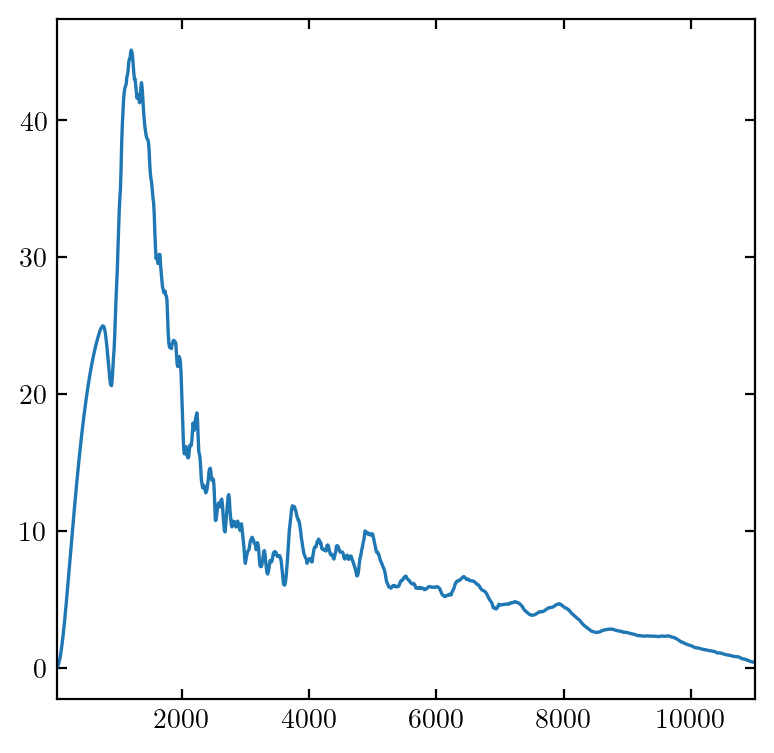

In [4]:
templateN = '20'
x,y = np.loadtxt('templates/naive'+templateN+'.sed',unpack=True)

plt.plot(x,y)
plt.xlim(50,11000)

#for band in bandpass_dict.values():
#    plt.plot(band.wavelen,10000*band.phi)

In [5]:
def idx_closest(x,array):
    return np.fabs(np.array(array)-x).argmin()

def get_continuum(sed,left,right,buffer=500,order=2):
    
    idxlo1 = idx_closest(left-buffer,sed.wavelen)
    idxhi1 = idx_closest(left,sed.wavelen)  
    idxlo2 = idx_closest(right,sed.wavelen)
    idxhi2 = idx_closest(right+buffer,sed.wavelen)
    
    x = np.concatenate((sed.wavelen[idxlo1:idxhi1],sed.wavelen[idxlo2:idxhi2]))
    y = np.concatenate((sed.flambda[idxlo1:idxhi1],sed.flambda[idxlo2:idxhi2]))
    
    continuum = np.polynomial.Chebyshev.fit(x,y,deg=order)
    
    plt.scatter(x,y,c="C1",s=12)
    plt.plot(sed.wavelen,sed.flambda)
    plt.plot(np.linspace(x[0],x[-1]),continuum(np.linspace(x[0],x[-1])),c='C3',lw=2)
    
    return continuum

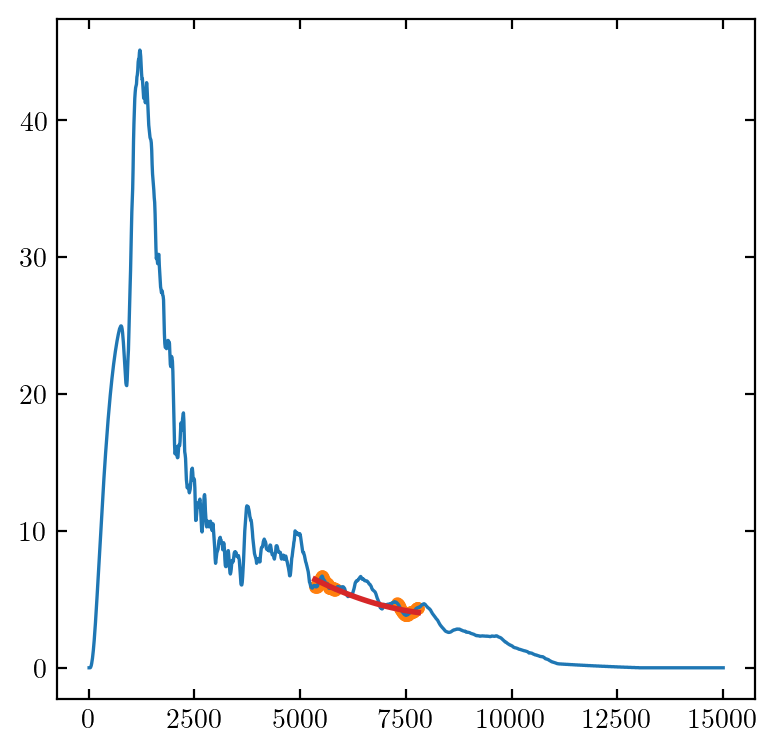

In [6]:
#f = get_continuum(Sed(x,y),5900,7000)
f = get_continuum(Sed(x,y),5850,7300)

In [7]:
def get_subtracted(sed,left,right,buffer=500,order=2):
    
    subtracted = copy.deepcopy(sed)
    
    idxlo = idx_closest(left,subtracted.wavelen)
    idxhi = idx_closest(right,subtracted.wavelen)
    
    subtracted.flambda[:idxlo] *= 0
    subtracted.flambda[idxhi:] *= 0
    
    continuum = get_continuum(sed,left,right,buffer,order)
    subtracted.flambda[idxlo:idxhi] -= continuum(subtracted.wavelen[idxlo:idxhi])
    
    plt.plot(subtracted.wavelen,subtracted.flambda)
    
    return subtracted

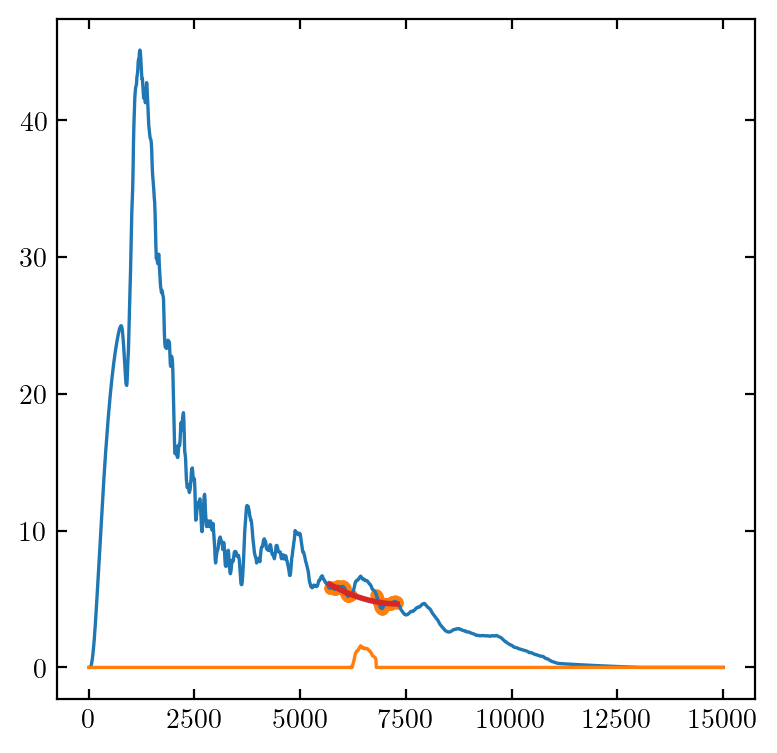

In [8]:
#subtracted = get_subtracted(Sed(x,y),5900,7000)
subtracted = get_subtracted(Sed(x,y),6200,6800)

In [9]:
FWHM = 30
sig = FWHM/2.355

bands = bandpass_dict.keys()
maxz = 3

def Ha_photometry(x,c):
    
    L = 6563
    
    lineSED = Sed(x,0*x)
    gauss = lambda x: np.exp(-(x-L)**2/(2*sig**2))
    lineSED.flambda += c*gauss(lineSED.wavelen)
    
    wavelens = np.array([])
    fluxes = np.array([])
    for z in np.linspace(0,maxz,200):
        lineSED_ = copy.deepcopy(lineSED)
        lineSED_.redshift(z)
        wavelens_ = [bandpass_dict[band].eff_wavelen/(1+z) for band in bands]
        fluxes_ = lineSED_.fluxlist(bandpass_dict,bands)
        wavelens = np.concatenate((wavelens,wavelens_))
        fluxes = np.concatenate((fluxes,fluxes_))
        
    idx = np.argsort(wavelens)
    wavelens = wavelens[idx]
    fluxes = medfilt(fluxes[idx],kernel_size=11)
    
    f = interp1d(wavelens,fluxes,bounds_error=False,fill_value=0)
    return f(x)  

def Hb_photometry(x,c):
    
    L = 4861
    
    lineSED = Sed(x,0*x)
    gauss = lambda x: np.exp(-(x-L)**2/(2*sig**2))
    lineSED.flambda += c*gauss(lineSED.wavelen)
    
    wavelens = np.array([])
    fluxes = np.array([])
    for z in np.linspace(0,maxz,200):
        lineSED_ = copy.deepcopy(lineSED)
        lineSED_.redshift(z)
        wavelens_ = [bandpass_dict[band].eff_wavelen/(1+z) for band in bands]
        fluxes_ = lineSED_.fluxlist(bandpass_dict,bands)
        wavelens = np.concatenate((wavelens,wavelens_))
        fluxes = np.concatenate((fluxes,fluxes_))
        
    idx = np.argsort(wavelens)
    wavelens = wavelens[idx]
    fluxes = medfilt(fluxes[idx],kernel_size=11)
    
    f = interp1d(wavelens,fluxes,bounds_error=False,fill_value=0)
    return f(x) 

def O2_photometry(x,c):
    
    L = 3727
    
    lineSED = Sed(x,0*x)
    gauss = lambda x: np.exp(-(x-L)**2/(2*sig**2))
    lineSED.flambda += c*gauss(lineSED.wavelen)
    
    wavelens = np.array([])
    fluxes = np.array([])
    for z in np.linspace(0,maxz,200):
        lineSED_ = copy.deepcopy(lineSED)
        lineSED_.redshift(z)
        wavelens_ = [bandpass_dict[band].eff_wavelen/(1+z) for band in bands]
        fluxes_ = lineSED_.fluxlist(bandpass_dict,bands)
        wavelens = np.concatenate((wavelens,wavelens_))
        fluxes = np.concatenate((fluxes,fluxes_))
        
    idx = np.argsort(wavelens)
    wavelens = wavelens[idx]
    fluxes = medfilt(fluxes[idx],kernel_size=11)
    
    f = interp1d(wavelens,fluxes,bounds_error=False,fill_value=0)
    return f(x) 

def O3_photometry(x,c):
    
    L = 5007 # 4959
    
    lineSED = Sed(x,0*x)
    gauss = lambda x: np.exp(-(x-L)**2/(2*sig**2))
    lineSED.flambda += c*gauss(lineSED.wavelen)
    
    wavelens = np.array([])
    fluxes = np.array([])
    for z in np.linspace(0,maxz,200):
        lineSED_ = copy.deepcopy(lineSED)
        lineSED_.redshift(z)
        wavelens_ = [bandpass_dict[band].eff_wavelen/(1+z) for band in bands]
        fluxes_ = lineSED_.fluxlist(bandpass_dict,bands)
        wavelens = np.concatenate((wavelens,wavelens_))
        fluxes = np.concatenate((fluxes,fluxes_))
        
    idx = np.argsort(wavelens)
    wavelens = wavelens[idx]
    fluxes = medfilt(fluxes[idx],kernel_size=11)
    
    f = interp1d(wavelens,fluxes,bounds_error=False,fill_value=0)
    return f(x) 

In [10]:
popt,_ = curve_fit(Ha_photometry,subtracted.wavelen,medfilt(subtracted.flambda,kernel_size=11),bounds=(0,np.inf))
print(popt)

[23.29212731]


(50, 11000)

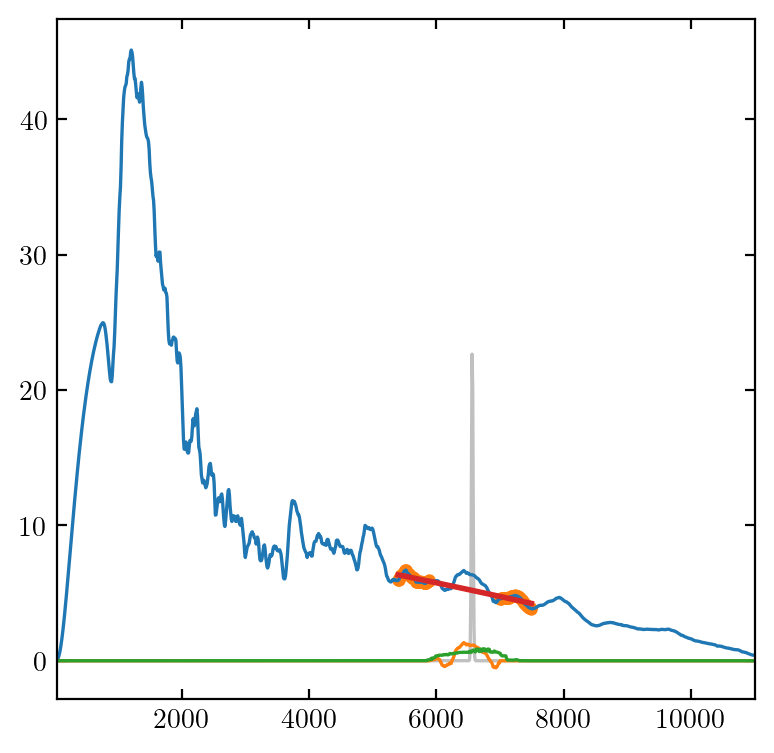

In [11]:
subtracted = get_subtracted(Sed(x,y),5900,7000)

plt.plot(x,Ha_photometry(x,*popt))

gauss = lambda x: popt[0]*np.exp(-(x-6563)**2/(2*sig**2))
plt.plot(subtracted.wavelen,gauss(subtracted.wavelen),c='silver',zorder=0)

plt.xlim(50,11000)
#plt.ylim(0,2)

(50, 11000)

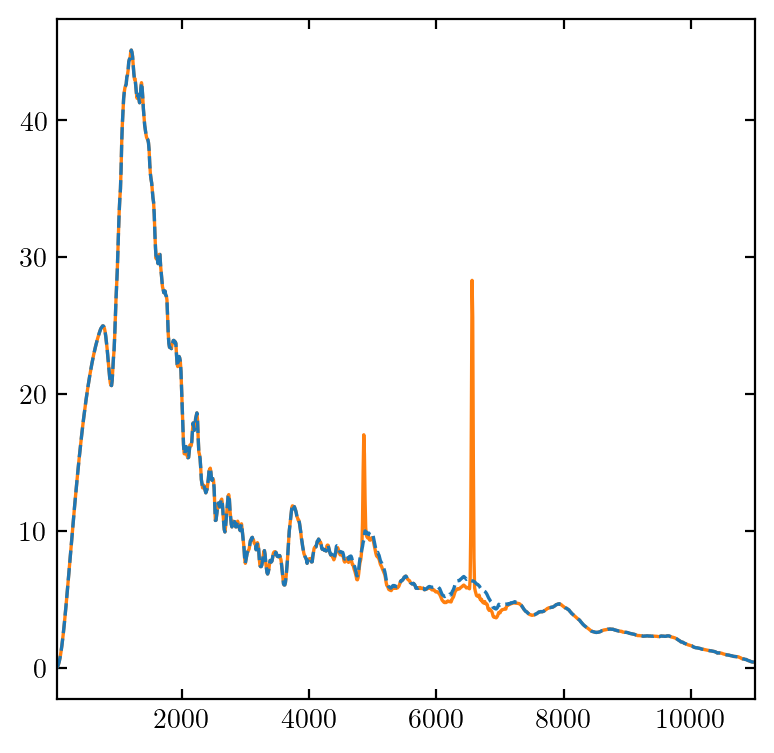

In [12]:
new = Sed()
new.wavelen = copy.copy(x)
new.flambda = copy.copy(y)

# Add Halpha
new.flambda -= Ha_photometry(x,*popt)
gauss = lambda x: popt[0]*np.exp(-(x-6563)**2/(2*sig**2))
new.flambda += gauss(new.wavelen)

# Add Hbeta
new.flambda -= Hb_photometry(x,*popt/2.9)
gauss = lambda x: popt[0]/2.9*np.exp(-(x-4861)**2/(2*sig**2))
new.flambda += gauss(new.wavelen)

plt.plot(new.wavelen,new.flambda,c='C1')

plt.plot(x,y,ls='--')

plt.xlim(50,11000)

432.13257381641495
698.1444494904542


(5850, 7300)

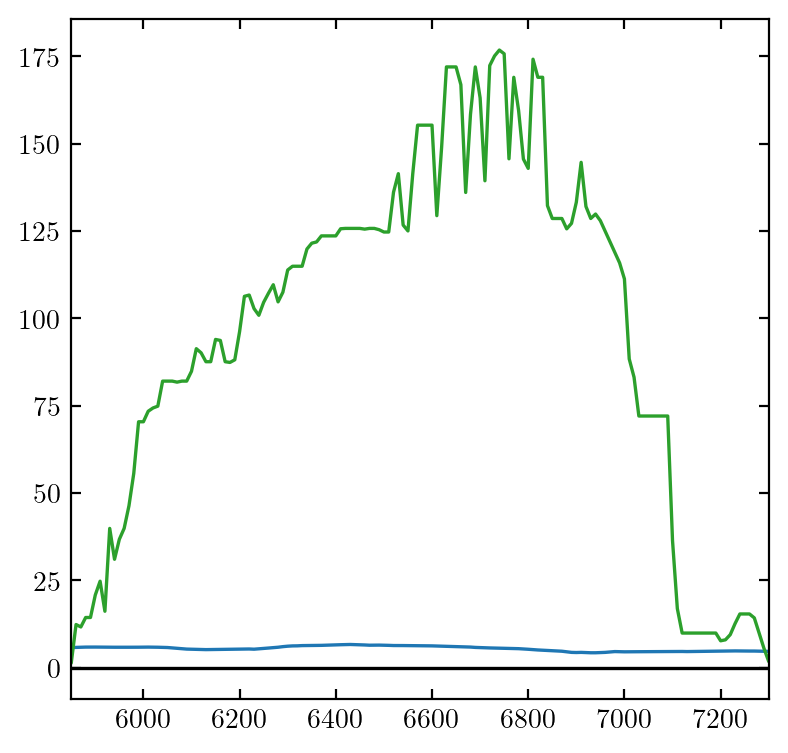

In [13]:
plt.plot(x,y)
plt.plot(x,200*Ha_photometry(x,popt[0]),c='C2')
plt.hlines(0,50,11000)

print(simps(subtracted.flambda,subtracted.wavelen))
print(simps(Ha_photometry(x,popt[0]),x))
plt.xlim(5850,7300)

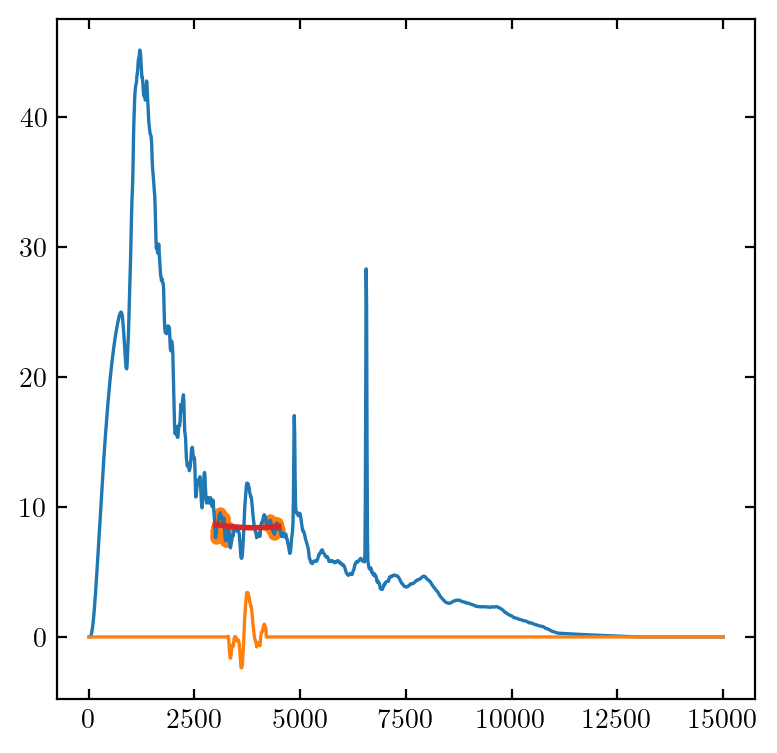

In [14]:
subtracted = get_subtracted(new,3300,4200,buffer=300)

In [15]:
popt,_ = curve_fit(O2_photometry,subtracted.wavelen,medfilt(subtracted.flambda,kernel_size=11),bounds=(0,np.inf))
print(popt)

[12.30591054]


(50, 11000)

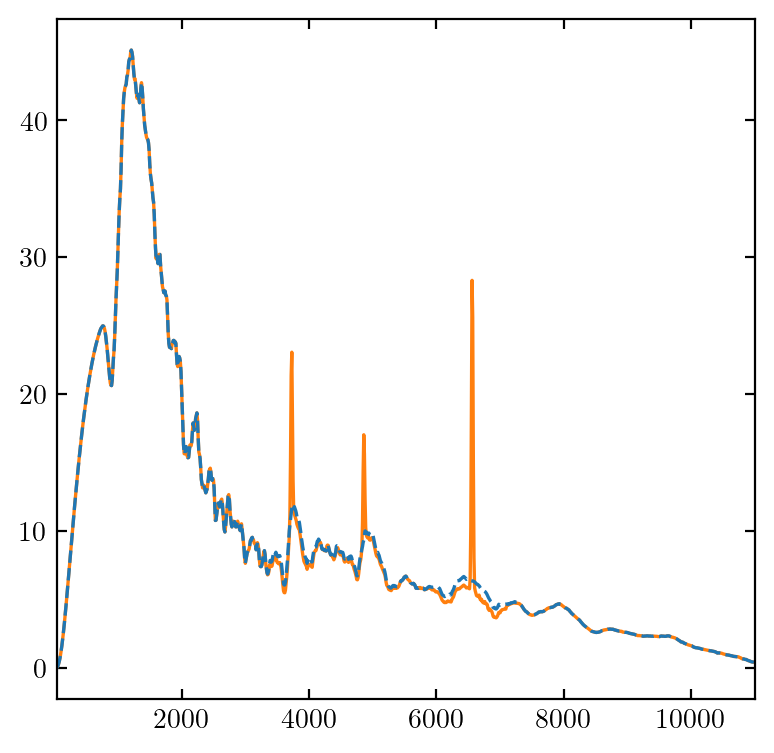

In [16]:
# Add O2
new.flambda -= O2_photometry(x,*popt)
gauss = lambda x: popt[0]*np.exp(-(x-3727)**2/(2*sig**2))
new.flambda += gauss(new.wavelen)

plt.plot(new.wavelen,new.flambda,c='C1')

plt.plot(x,y,ls='--')

plt.xlim(50,11000)

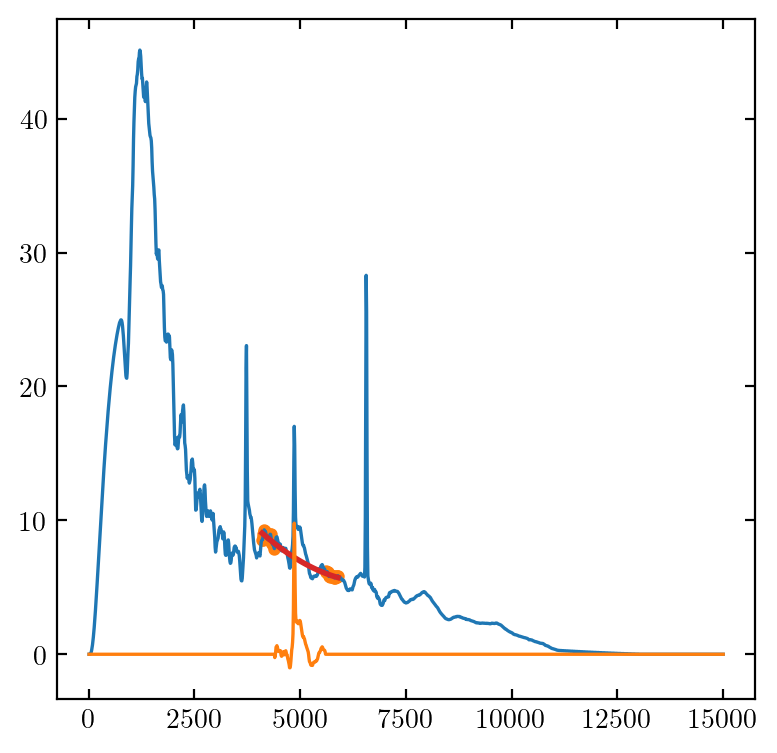

In [17]:
subtracted = get_subtracted(new,4400,5600,buffer=300)

In [18]:
popt,_ = curve_fit(O3_photometry,subtracted.wavelen,medfilt(subtracted.flambda,kernel_size=11),bounds=(0,np.inf))
print(popt)

[21.76913941]


(50, 11000)

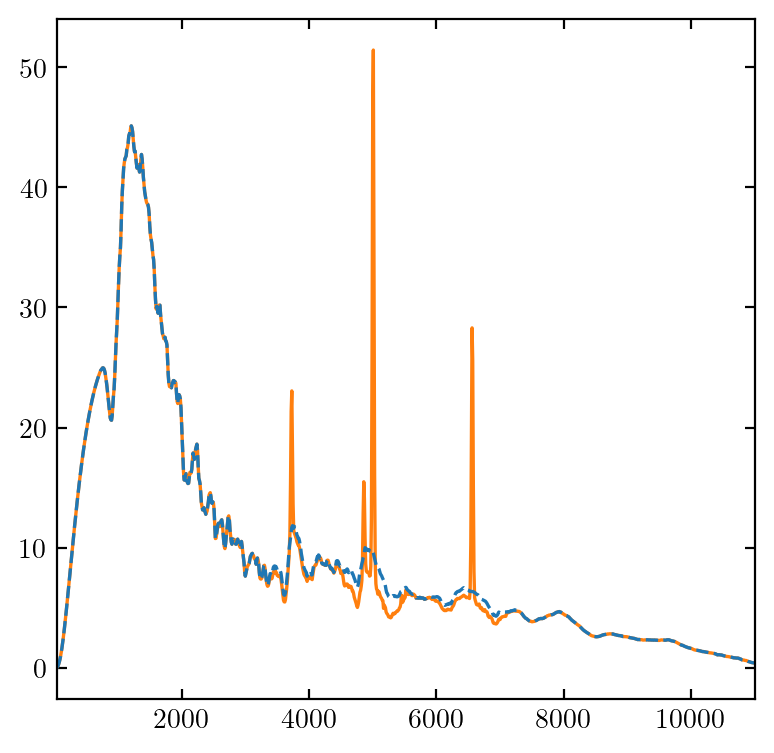

In [22]:
# Add O3
new.flambda -= O3_photometry(x,*popt)
gauss = lambda x: popt[0]*np.exp(-(x-5007)**2/(2*sig**2))
new.flambda += gauss(new.wavelen)

plt.plot(new.wavelen,new.flambda,c='C1')

plt.plot(x,y,ls='--')

plt.xlim(50,11000)

Eq. Widths

In [20]:
popt[0] = 15.68436059
gauss = lambda x: popt[0]*np.exp(-(x-6583)**2/(2*sig**2))
Y = gauss(new.wavelen)/(new.flambda+1e-12)
eqW = simps(Y,new.wavelen)
print("H-alpha {:0.2f}".format(eqW))

popt[0] = 15.68436059/2.9
gauss = lambda x: popt[0]*np.exp(-(x-4861)**2/(2*sig**2))
Y = gauss(new.wavelen)/(new.flambda+1e-12)
eqW = simps(Y,new.wavelen)
print("H-beta {:0.2f}".format(eqW))

popt[0] = 12.90344696
gauss = lambda x: popt[0]*np.exp(-(x-3727)**2/(2*sig**2))
Y = gauss(new.wavelen)/(new.flambda+1e-12)
eqW = simps(Y,new.wavelen)
print("OII {:0.2f}".format(eqW))

popt[0] = 23.27736845
gauss = lambda x: popt[0]*np.exp(-(x-5007)**2/(2*sig**2))
Y = gauss(new.wavelen)/(new.flambda+1e-12)
eqW = simps(Y,new.wavelen)
print("OIII {:0.2f}".format(eqW))

H-alpha 46.47
H-beta 12.69
OII 21.92
OIII 34.28
